In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
%matplotlib inline

In [3]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv('Flight_Booking.csv')
data = data.drop(columns = ['Unnamed: 0'])

Loading the data

In [7]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [13]:
data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

Data Visualization

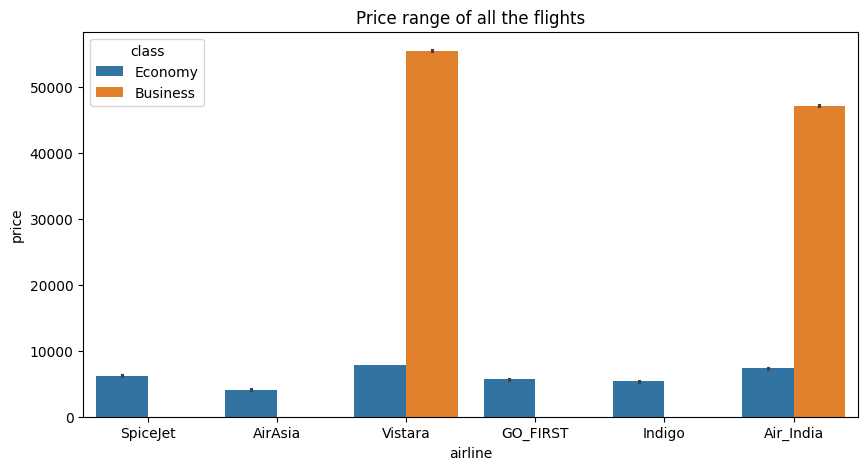

In [16]:
plt.figure(figsize = (10,5))

sb.barplot( x = data['airline'], y = data['price'], hue = data['class'])
plt.title('Price range of all the flights')

plt.show()

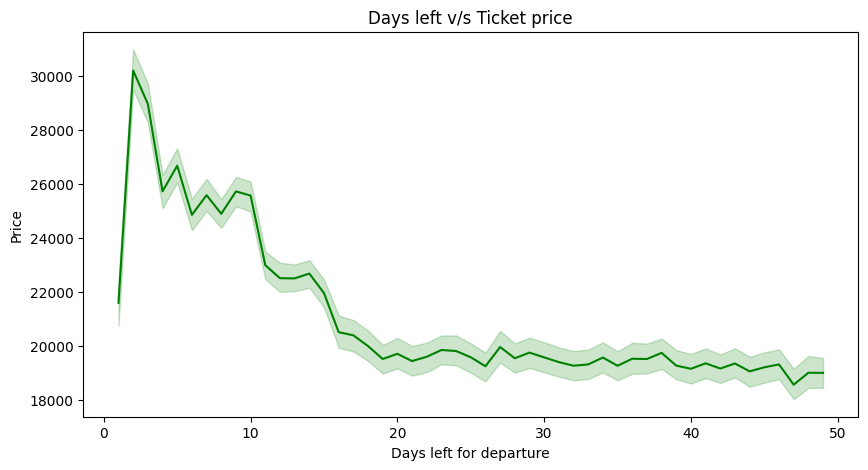

In [17]:
plt.figure(figsize = (10,5))
sb.lineplot(data, x = 'days_left', y = 'price', color = 'green')

plt.title('Days left v/s Ticket price')
plt.xlabel('Days left for departure')
plt.ylabel('Price')

plt.show()

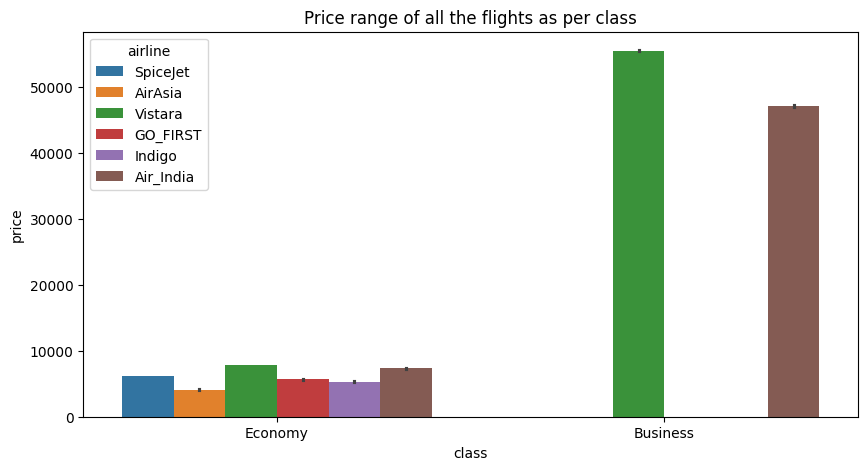

In [18]:
plt.figure(figsize = (10,5))

sb.barplot(data, x = 'class', y = 'price', hue = 'airline')
plt.title('Price range of all the flights as per class')

plt.show()

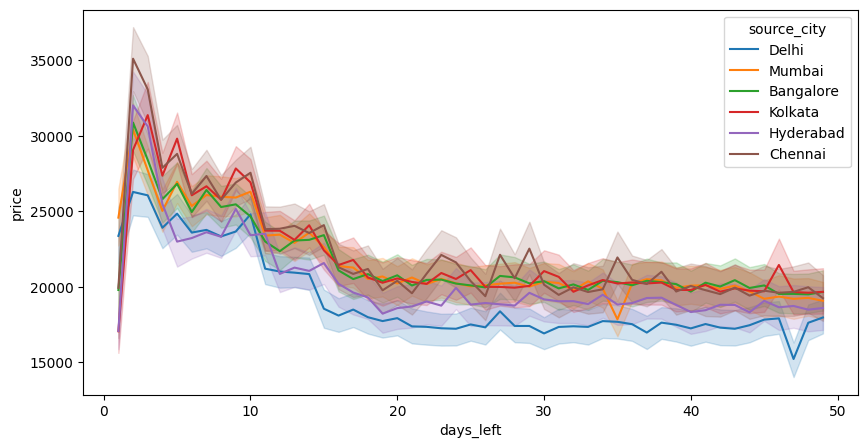

In [19]:
plt.figure(figsize = (10,5))
sb.lineplot(data, x = 'days_left', y = 'price', color = 'green', hue = 'source_city')

plt.show()

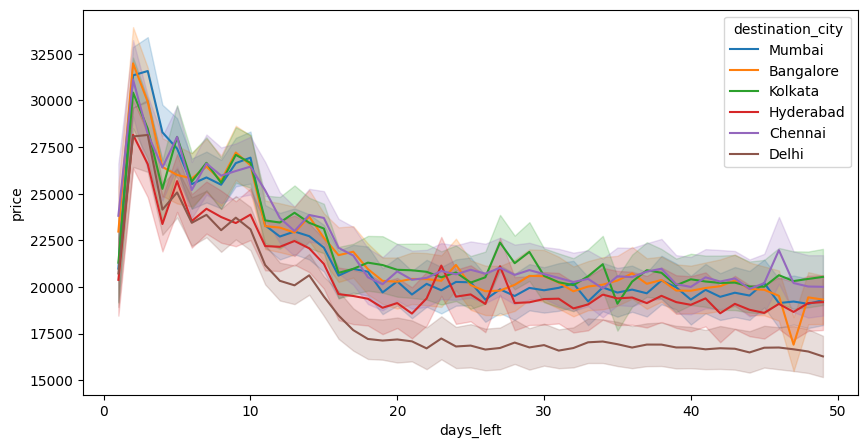

In [21]:
plt.figure(figsize = (10,5))
sb.lineplot(data, x = 'days_left', y = 'price', color = 'green', hue = 'destination_city')

plt.show()

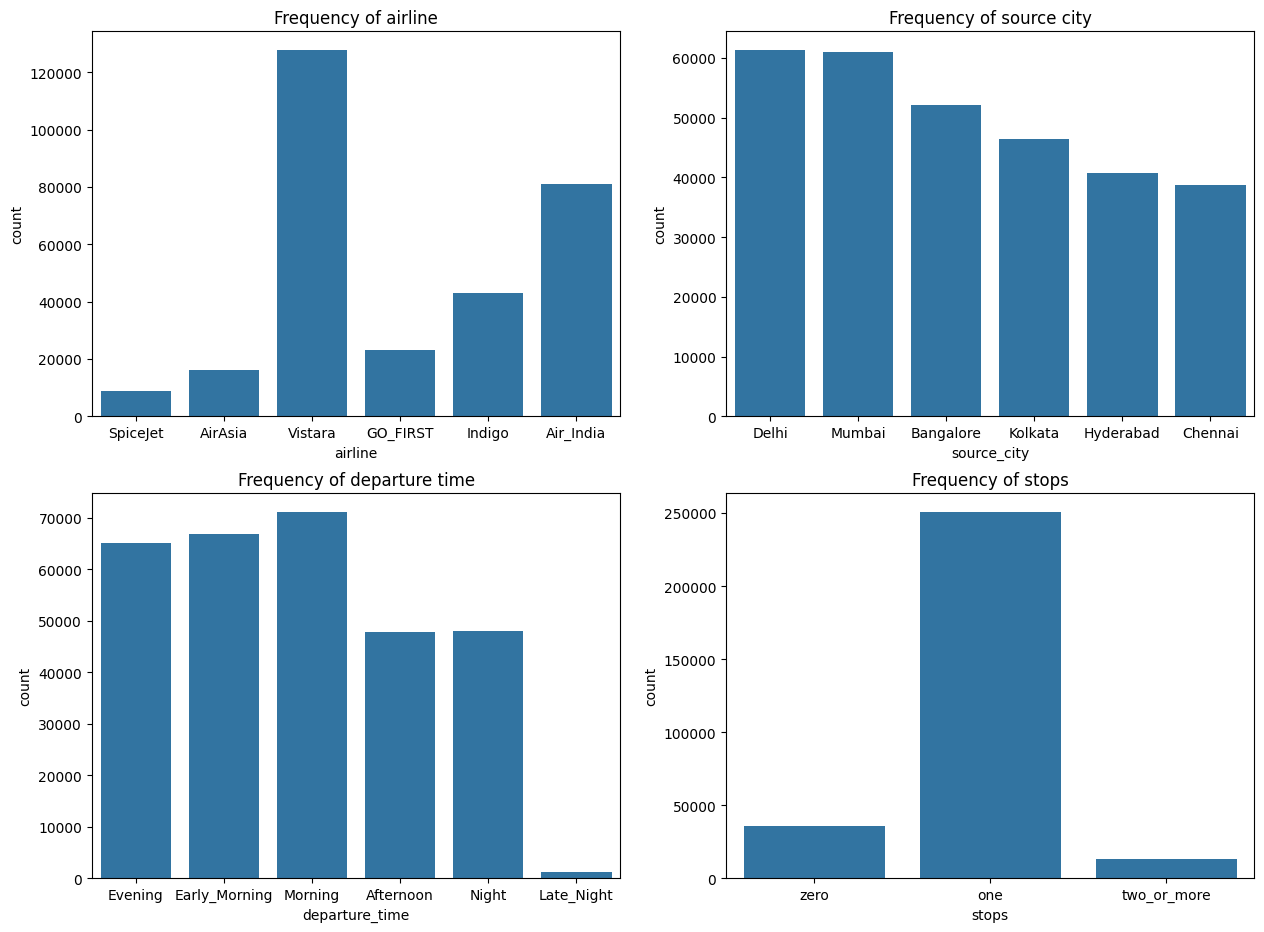

In [22]:
plt.figure(figsize = (15,23))

plt.subplot(4, 2, 1)
sb.countplot(data, x = 'airline')
plt.title('Frequency of airline')

plt.subplot(4, 2, 2)
sb.countplot(data, x = 'source_city')
plt.title('Frequency of source city')

plt.subplot(4, 2, 3)
sb.countplot(data, x = 'departure_time')
plt.title('Frequency of departure time')

plt.subplot(4, 2, 4)
sb.countplot(data, x = 'stops')
plt.title('Frequency of stops')

plt.show()

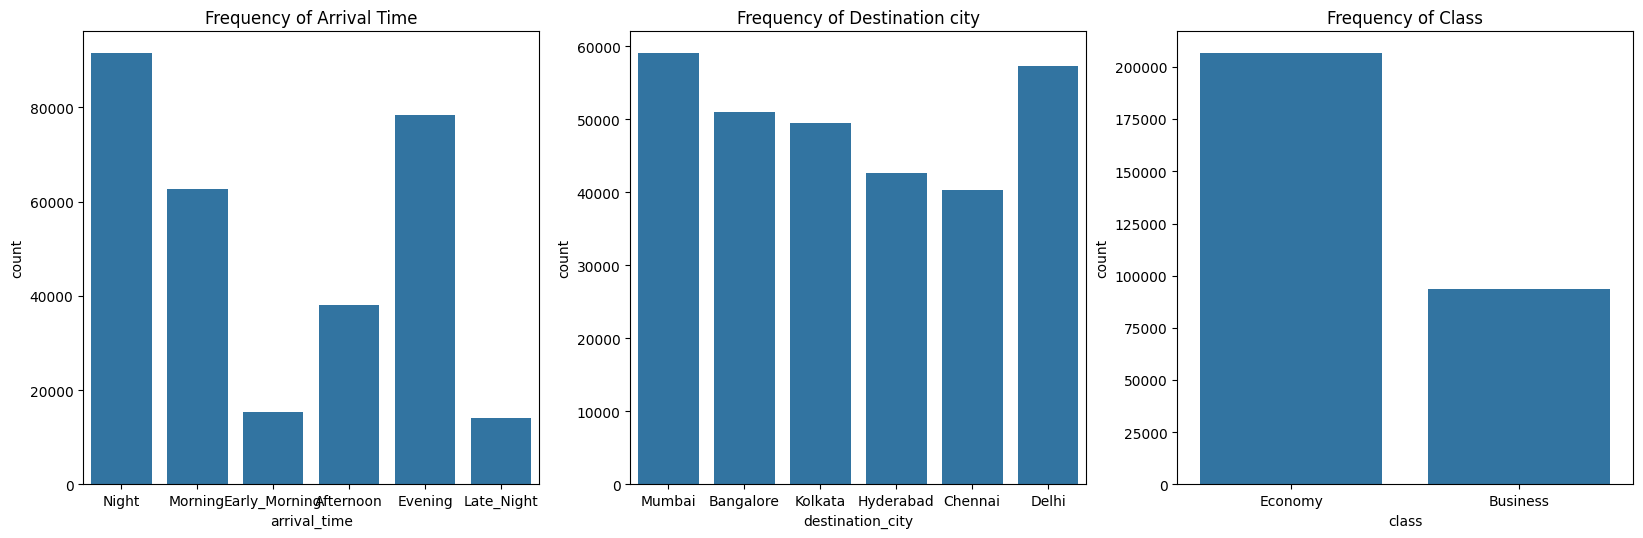

In [23]:
plt.figure(figsize = (20,20))

plt.subplot(3, 3, 1)
sb.countplot(data, x = 'arrival_time')
plt.title('Frequency of Arrival Time')

plt.subplot(3, 3, 2)
sb.countplot(data, x = 'destination_city')
plt.title('Frequency of Destination city')

plt.subplot(3, 3, 3)
sb.countplot(data, x = 'class')
plt.title('Frequency of Class')

plt.show()

Label Encoding 

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['flight'] = le.fit_transform(data['flight'])
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


Feature Extraction

In [30]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

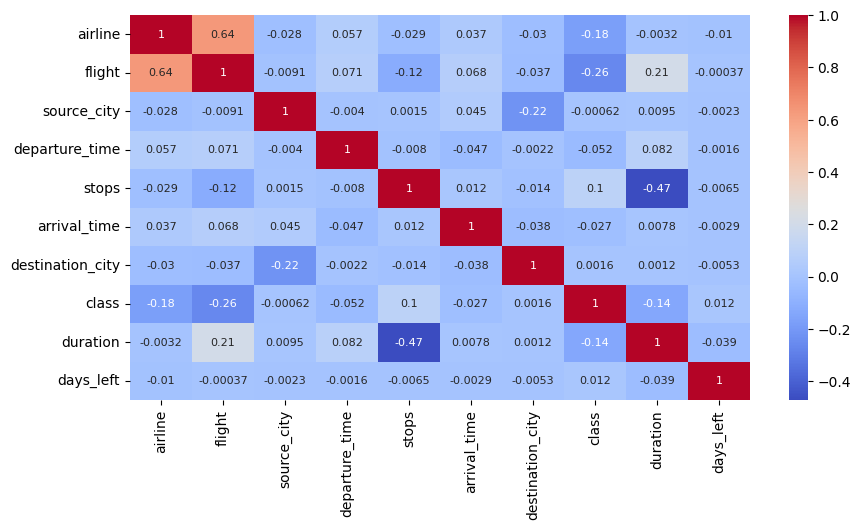

In [31]:
plt.figure(figsize = (10,5))

dataplot = sb.heatmap(x_train.corr(), annot = True, cmap = 'coolwarm', annot_kws={"size": 8})
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

data = data.drop(columns=["stops"])

col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591
            feature        VIF
0           airline   6.701787
1            flight  12.580589
2       source_city   2.943789
3    departure_time   2.777994
4      arrival_time   3.745147
5  destination_city   2.896438
6             class   2.777535
7          duration   3.956469
8         days_left   4.053072


In [33]:
data.head()

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,4,5,1,2.33,1,5953
2,0,1213,2,1,1,5,1,2.17,1,5956
3,5,1559,2,4,0,5,1,2.25,1,5955
4,5,1549,2,4,4,5,1,2.33,1,5955


Standardisation is an important step in many machine learning algorithms for several reasons:

1) Some algorithms, like Linear Regression, are sensitive to the scale of the input features. If one feature has a range of 0-1 and another has a range of 0-1000, the algorithm might not perform well. Standardisation brings all features to the same scale, making the algorithm more stable and efficient.

2) Algorithms that use gradient descent for optimisation converge faster when the features are standardised. This is because standardisation transforms the features to have a mean of 0 and a standard deviation of 1, which helps the gradient descent algorithm navigate the parameter space more efficiently.

In [36]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

Linear Regressor

In [38]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Actual value", "Predicted value"])
difference.head()

,Actual value,Predicted value
0,44652.0,49972.594384
1,7488.0,10463.502448
2,4792.0,10176.199344
3,54608.0,52080.097937
4,4298.0,7284.937951


In [39]:
from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(y_test, y_pred))

from sklearn import metrics

print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root mean sqaured error: ', metrics.root_mean_squared_error(y_test, y_pred))

R2 Score:  0.9045898126760484
Mean absolute error:  4624.375871141332
Mean squared error:  48967116.3348931
Root mean sqaured error:  6997.650772573114


Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)


from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(y_test, y_pred))


from sklearn import metrics

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', mean_abs_error)

print('Mean percentage absolute error: ', metrics.mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', root_mean_sq_error)


R2 Score:  0.954118114506524
Mean absolute error:  1870.527635721544
Mean percentage absolute error:  0.10378718609133124
Mean squared error:  23547837.89486682
Root mean squared error:  4852.6114510505395


Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)


from sklearn.metrics import r2_score

print('R2 Score: ', r2_score(y_test, y_pred))


from sklearn import metrics

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', mean_abs_error)

print('Mean percentage absolute error: ', metrics.mean_absolute_percentage_error(y_test, y_pred))

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', root_mean_sq_error)

/Users/dharyavardhan/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score:  0.9718451645588948
Mean absolute error:  1670.8811303716507
Mean percentage absolute error:  0.09374632478053181
Mean squared error:  14449831.208834358
Root mean squared error:  3801.2933600071383


In [67]:
le_airline = le.fit_transform(data['airline'])
le_price = le.fit_transform(data['price'])

In [69]:
import pickle

In [79]:
data = {"model": rfr, "le_airline": le_airline, "le_price": le_price}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

rfr_loaded = data["model"]
le_airline = data["le_airline"]
le_price = data["le_price"]

In [85]:
y_pred = rfr_loaded.predict(x)
y_pred

/Users/dharyavardhan/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([8046.94, 8046.94, 8046.94, ..., 7451.05, 7451.05, 7451.05])